# Credit Risk Analysis

Projeto desenvolvido por:
* Mariana Ramos - up201806869
* Pedro Ferreira - up201806506
* Pedro Ponte - up201809694

## Table of contents

1. [Introduction](#Introduction)

2. [Required Libraries](#Required-Libraries)

3. [The Problem Domain](#The-Problem-Domain)

4. [Step 1: Answering the question](#Step-1:-Answering-the-question)

5. [Step 2: Checking the data](#Step-2:-Checking-the-data)

6. [Step 3: Tidying the data](#Step-3:-Tidying-the-data)

7. [Step 4: Exploratory Analysis](#Step-4:-Exploratory-Analysis)

9. [Step 5: Classification](#Step-5:-Classification)

    - [5.1: Decision Trees](#5.1:-Decision-Trees)
        
        - [5.1.1: Cross Validation](#5.1.1:-Cross-Validation)

        - [5.1.2: Parameter Tuning](#5.1.2:-Parameter-Tuning)
    
    - [5.2: K-Nearest Neighbor](#5.2:-K-Nearest-Neighbor)

## Introduction

[[ go back to the top ]](#Table-of-contents)

## Required libraries

[[ go back to the top ]](#Table-of-contents)

If you don't have Python on your computer, you can use the [Anaconda Python distribution](http://continuum.io/downloads) to install most of the Python packages you need. Anaconda provides a simple double-click installer for your convenience.

This notebook uses several Python packages that come standard with the Anaconda Python distribution. The primary libraries that we'll be using are:

* **NumPy**: Provides a fast numerical array structure and helper functions.
* **pandas**: Provides a DataFrame structure to store data in memory and work with it easily and efficiently.
* **scikit-learn**: The essential Machine Learning package in Python.
* **matplotlib**: Basic plotting library in Python; most other Python plotting libraries are built on top of it.
* **Seaborn**: Advanced statistical plotting library.

To make sure you have all of the packages you need, install them with `conda`:

    conda install numpy pandas scikit-learn matplotlib seaborn
    
    conda install -c conda-forge watermark

`conda` may ask you to update some of them if you don't have the most recent version. Allow it to do so.

## The Problem Domain

[[ go back to the top ]](#Table-of-contents)

## Step 1: Answering the question

[[ go back to the top ]](#Table-of-contents)

The first step to any data analysis project is to define the question or problem we're looking to solve, and to define a measure (or set of measures) for our success at solving that task. The data analysis checklist has us answer a handful of questions to accomplish that, so let's work through those questions.

>Did you specify the type of data analytic question (e.g. exploration, association causality) before touching the data?

We're trying to design a predictive model in order to evaluate the credit risk of a given loan and decide whether the loan should be granted or not.

>Did you define the metric for success before beginning?

Let's do that now. Since we're performing classification, we can use [accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision) — the fraction of correctly classified loans — to quantify how well our model is performing. The accuracy achieved should be, at least, 

>Did you understand the context for the question and the scientific or business application?

TODO

>Did you record the experimental design?

TODO

>Did you consider whether the question could be answered with the available data?

TODO

<hr />

## Step 2: Checking the data

[[ go back to the top ]](#Table-of-contents)

In order to be able to make conclusions and reach our goal, we will need to extract and study the data. To do so, we have to import the panda library and extract the information to be stored in a variable so we can work with it. 

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

credit_data = pd.read_csv('data.csv', low_memory=False)

In [2]:
# data frame shape
print('Number of rows: ', credit_data.shape[0])
print('Number of columns: ', credit_data.shape[1])

Number of rows:  855969
Number of columns:  73


As we can see the data file has a total of 855969 different results and a total of 73 evaluation criteria. The second parameter of the read_csv function makes all the empty fields be filled with NA so we can easily analyse missing values in the future.

We can start by reading the data into a pandas DataFrame to see if is everything alright.

In [3]:
credit_data.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
7,1072053,1288686,3000,3000,3000.0,36 months,18.64,109.43,E,E1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
8,1071795,1306957,5600,5600,5600.0,60 months,21.28,152.39,F,F2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
9,1071570,1306721,5375,5375,5350.0,60 months,12.69,121.45,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [4]:
credit_data.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
855964,36371250,39102635,10000,10000,10000.0,36 months,11.99,332.10,B,B5,...,NaN,NaN,NaN,NaN,NaN,17100.0,NaN,NaN,NaN,0
855965,36441262,39152692,24000,24000,24000.0,36 months,11.99,797.03,B,B5,...,NaN,NaN,NaN,NaN,NaN,10200.0,NaN,NaN,NaN,0
855966,36271333,38982739,13000,13000,13000.0,60 months,15.99,316.07,D,D2,...,NaN,NaN,NaN,NaN,NaN,18000.0,NaN,NaN,NaN,0
855967,36490806,39222577,12000,12000,12000.0,60 months,19.99,317.86,E,E3,...,NaN,NaN,NaN,NaN,NaN,27000.0,NaN,NaN,NaN,0
855968,36271262,38982659,20000,20000,20000.0,36 months,11.99,664.20,B,B5,...,NaN,NaN,NaN,NaN,NaN,41700.0,NaN,NaN,NaN,0


In [5]:
credit_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
count,8.559690e+05,8.559690e+05,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,8.559690e+05,855969.000000,855969.000000,...,11609.000000,13288.000000,13288.000000,13288.000000,13288.000000,7.886560e+05,13288.000000,13288.000000,13288.000000,855969.000000
mean,3.224073e+07,3.476269e+07,14745.571335,14732.378305,14700.061226,13.192320,436.238072,7.507119e+04,18.122165,0.311621,...,71.486993,1.354305,2.945515,5840.443332,61.024526,3.216357e+04,0.947772,1.524232,1.841963,0.054286
std,2.271969e+07,2.399418e+07,8425.340005,8419.471653,8425.805478,4.368365,243.726876,6.426447e+04,17.423629,0.857189,...,23.015293,1.483710,2.595313,5108.500262,20.018117,3.769964e+04,1.441667,2.697601,2.975049,0.226581
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,5.320000,15.690000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000,0.000000
25%,9.067986e+06,1.079273e+07,8000.000000,8000.000000,8000.000000,9.990000,260.550000,4.500000e+04,11.880000,0.000000,...,58.500000,0.000000,1.000000,2405.000000,47.900000,1.400000e+04,0.000000,0.000000,0.000000,0.000000
50%,3.431355e+07,3.697532e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.610000,0.000000,...,75.000000,1.000000,2.000000,4485.500000,62.100000,2.380000e+04,0.000000,0.000000,2.000000,0.000000
75%,5.446311e+07,5.803559e+07,20000.000000,20000.000000,20000.000000,15.990000,571.560000,9.000000e+04,23.900000,0.000000,...,87.500000,2.000000,4.000000,7701.250000,75.300000,3.990000e+04,1.000000,2.000000,3.000000,0.000000
max,6.861687e+07,7.351969e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,...,223.300000,22.000000,43.000000,83047.000000,151.400000,9.999999e+06,15.000000,33.000000,32.000000,1.000000


Let's examine the structure of the data set.

In [6]:
# all data frame columns
credit_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'acc_now_delinq', 'tot_col

In [7]:
# data frame summary
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 73 columns):
id                             855969 non-null int64
member_id                      855969 non-null int64
loan_amnt                      855969 non-null int64
funded_amnt                    855969 non-null int64
funded_amnt_inv                855969 non-null float64
term                           855969 non-null object
int_rate                       855969 non-null float64
installment                    855969 non-null float64
grade                          855969 non-null object
sub_grade                      855969 non-null object
emp_title                      806526 non-null object
emp_length                     812908 non-null object
home_ownership                 855969 non-null object
annual_inc                     855969 non-null float64
verification_status            855969 non-null object
issue_d                        855969 non-null object
pymnt_plan               

We can see that some features have missing values. Let's take a closer look at them.

In [8]:
# percentage of missing values per feature
print((credit_data.isnull().sum() * 100 / credit_data.shape[0]).sort_values(ascending=False))

verification_status_joint      99.948363
annual_inc_joint               99.948363
dti_joint                      99.948363
il_util                        98.643759
mths_since_rcnt_il             98.488964
total_bal_il                   98.447607
inq_last_12m                   98.447607
open_acc_6m                    98.447607
open_il_6m                     98.447607
open_il_24m                    98.447607
open_il_12m                    98.447607
open_rv_12m                    98.447607
open_rv_24m                    98.447607
max_bal_bc                     98.447607
all_util                       98.447607
inq_fi                         98.447607
total_cu_tl                    98.447607
desc                           85.769111
mths_since_last_record         84.674211
mths_since_last_major_derog    75.099682
mths_since_last_delinq         51.381767
next_pymnt_d                   29.553757
tot_cur_bal                     7.863953
tot_coll_amt                    7.863953
total_rev_hi_lim

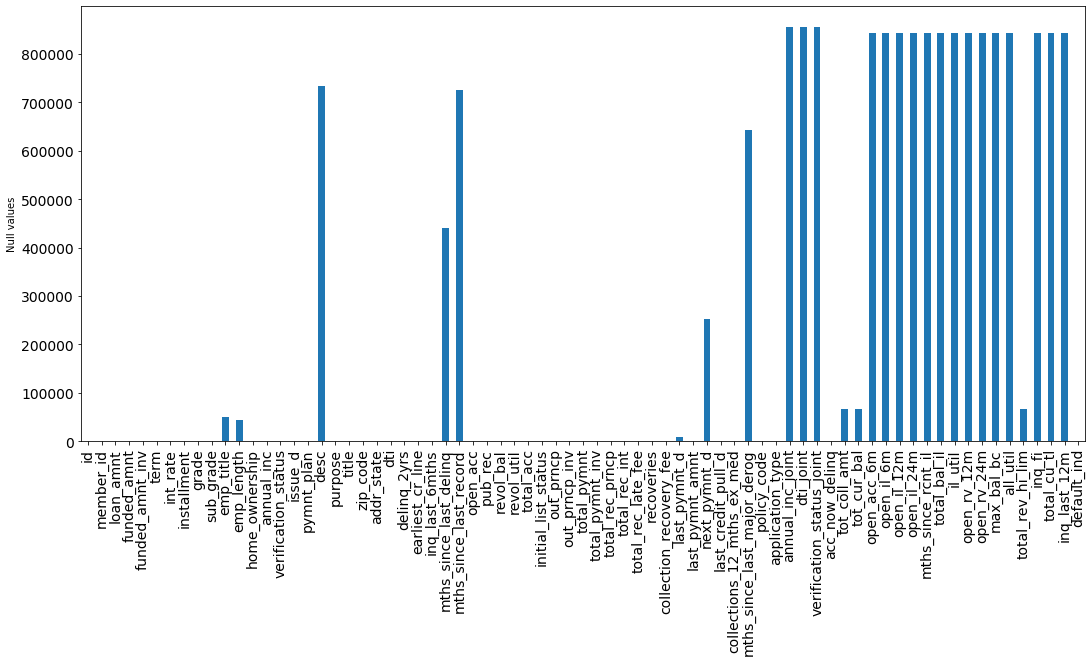

In [9]:
credit_data.isnull().sum().plot(kind='bar', figsize=(18,8), fontsize=14,);
plt.ylabel('Null values');

## Step 3: Tidying the data
[[ go back to the top ]](#Table-of-contents)

Looking to all features and the respective percentage of missing values, we can conclude that some of them (like *verification_status_joint*, *annual_inc_joint*, *dti_joint*, *il_util*, *mths_since_rcnt_il*, *total_bal_il*, *inq_last_12m*, *open_acc_6m*, *open_il_6m*, *open_il_24m*, *open_il_12m*, *open_rv_12m*, *open_rv_24m*, *max_bal_bc*, *all_util*, *inq_fi*, *total_cu_tl* have almost all entries missing. As this feature is not crucial for the project, we are dropping it. 

In [10]:
# drop the columns
credit_data.drop(['verification_status_joint', 'annual_inc_joint', 'dti_joint', 'il_util', 'mths_since_rcnt_il',
                   'total_bal_il', 'inq_last_12m', 'open_acc_6m', 'open_il_6m', 'open_il_24m', 'open_il_12m', 'open_rv_12m',
                   'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl'], axis=1, inplace=True)

Now, let's examine the number of unique values for each feature.

In [11]:
# number of unique observations per column
credit_data.nunique().sort_values()

policy_code                         1
default_ind                         2
application_type                    2
term                                2
pymnt_plan                          2
initial_list_status                 2
next_pymnt_d                        3
verification_status                 3
home_ownership                      6
grade                               7
acc_now_delinq                      8
inq_last_6mths                      9
emp_length                         11
collections_12_mths_ex_med         12
purpose                            14
delinq_2yrs                        29
pub_rec                            31
sub_grade                          35
addr_state                         51
open_acc                           77
last_pymnt_d                       97
last_credit_pull_d                102
issue_d                           103
mths_since_last_record            123
total_acc                         134
mths_since_last_delinq            155
mths_since_l

The feature *policy_code* only has one value, so we can conclude that this one is not important for our analysis and we can also drop this collumn.

In [12]:
# drop the column "policy_code"
credit_data.drop('policy_code', axis=1, inplace=True)

*id* and *member_id* features are randomly generated fields by bank for unique identification purposes only, so we can drop them.

In [13]:
# drop the columns "id" and "member_id"
credit_data.drop(['id', 'member_id'], axis=1, inplace=True)

Features like *funded_amnt*, *funded_amnt_inv*, *mths_since_last_record*, *out_prncp*, *out_prncp_inv*, *total_pymnt*, *total_pymnt_inv*, *total_rec_prncp*, *total_rec_int*, *total_rec_late_fee*, *recoveries*, *collection_recovery_fee*, *last_pymnt_d*, *last_pymnt_amnt*, *next_pymnt_d* can be dropped because they leak data from future, after the loan has already started to be funded. 

In [14]:
# drop columns
credit_data.drop(['funded_amnt', 'funded_amnt_inv', 'mths_since_last_record', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
                   'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 
                   'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d'], axis=1, inplace=True)

*emp_title* feature requires other data and a lot of processing to become potentially useful, so we opt to drop that one too.

In [15]:
# drop "emp_title" column
credit_data.drop('emp_title', axis=1, inplace=True)

Also *desc*, *initial_list_status*, *total_rev_hi_lim* features doesn't add value to our model, so we will drop them.

In [16]:
# drop "desc", "initial_list_status", "total_rev_hi_lim" columns
credit_data.drop(['desc', 'initial_list_status', 'total_rev_hi_lim'], axis=1, inplace=True)

*zip_code* feature is mostly redundant since only the first 3 digits of the 5 digit zip code are visible.

In [17]:
# drop "zip_code" column
credit_data.drop('zip_code', axis=1, inplace=True)

*addr_state* collumn seems like to contain categorical values. Let's explore the unique value counts of this column.

In [18]:
print(credit_data['addr_state'].value_counts())

CA    125172
NY     71114
TX     68708
FL     58639
IL     34379
NJ     32061
PA     30250
OH     28651
GA     28043
VA     25234
NC     23787
MI     22175
MD     20209
MA     19835
AZ     19693
WA     18816
CO     18211
MN     15424
MO     13743
IN     13348
CT     13042
TN     12392
NV     11972
WI     11199
AL     10732
OR     10562
SC     10302
LA     10186
KY      8299
OK      7759
KS      7693
AR      6399
UT      6055
NM      4757
HI      4380
WV      4247
NH      4156
RI      3753
MS      3653
MT      2466
DE      2402
DC      2382
AK      2134
WY      1974
VT      1753
SD      1745
NE      1124
ME       491
ND       452
ID         9
IA         7
Name: addr_state, dtype: int64


The *addr_state* column contains too many unique values, so it’s better to drop this.

In [19]:
# drop "addr_state" column
credit_data.drop('addr_state', axis=1, inplace=True)

Let's look at *pymnt_plan* feature values.

In [20]:
print(credit_data['pymnt_plan'].value_counts())

n    855964
y         5
Name: pymnt_plan, dtype: int64


It seems that this column has two unique values, *y* and *n*, with *y* occurring only 5 times. Let’s drop this column:

In [21]:
# drop "pymnt_plan" column
credit_data.drop('pymnt_plan', axis=1, inplace=True)

Let's also look at *application_type* column.

In [22]:
print(credit_data['application_type'].value_counts())

INDIVIDUAL    855527
JOINT            442
Name: application_type, dtype: int64


It seems that this column only has two unique values, *INDIVIDUAL* and *JOINT*, with *JOINT* occurring only 442 times. Let's drop this column too:

In [23]:
# drop "application_type" column
credit_data.drop('application_type', axis=1, inplace=True)

Next, let’s look at the unique value counts for the *purpose* and *title* columns to understand which columns we want to keep.

In [24]:
for name in ['purpose','title']:
    print("Unique Values in column: {}\n".format(name))
    print(credit_data[name].value_counts(),'\n')

Unique Values in column: purpose

debt_consolidation    505392
credit_card           200144
home_improvement       49956
other                  40949
major_purchase         16587
small_business          9785
car                     8593
medical                 8193
moving                  5160
vacation                4542
house                   3513
wedding                 2280
renewable_energy         549
educational              326
Name: purpose, dtype: int64 

Unique Values in column: title

Debt consolidation                          398089
Credit card refinancing                     159228
Home improvement                             38633
Other                                        30522
Debt Consolidation                           15469
Major purchase                               11519
Medical expenses                              6408
Business                                      6325
Car financing                                 5372
Consolidation                          

It appears the *purpose* and *title* columns do contain overlapping information. *title* column contains too many different values with distinct information, so it is hard to analyse its values. On the other hand, *purpose* has many unique values and they are nominal so, to convert them to numerical in order to analyse them will create many new collumns and difficult our job.
Taking this into account, we opt to drop both columns.

In [25]:
# drop "title" and "purpose" column
credit_data.drop(['title', 'purpose'], axis=1, inplace=True)

Looking at the features that we still have, we see that we have two that are very similar: *grade* and *sub_grade*.

In [26]:
for name in ['grade','sub_grade']:
    print("Unique Values in column: {}\n".format(name))
    print(credit_data[name].value_counts(),'\n')

Unique Values in column: grade

B    247998
C    236855
A    145665
D    132802
E     66448
F     21328
G      4873
Name: grade, dtype: int64 

Unique Values in column: sub_grade

B3    54958
B4    54116
C1    51588
C2    50457
C3    48337
B2    47589
B5    47333
C4    46941
B1    44002
A5    43957
C5    39532
D1    34667
A4    33991
D2    28385
D3    25289
D4    24253
A3    23095
A1    22516
A2    22106
D5    20208
E1    17230
E2    15994
E3    13294
E4    11011
E5     8919
F1     6702
F2     4979
F3     4099
F4     3168
F5     2380
G1     1698
G2     1259
G3      877
G4      570
G5      469
Name: sub_grade, dtype: int64 



We can conclude that *sub_grade* contains redundant information that is already in the *grade* column, so we can also drop this column.

In [27]:
# drop "sub_grade" column
credit_data.drop('sub_grade', axis=1, inplace=True)

In [28]:
null_counts = credit_data.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
loan_amnt                           0
term                                0
int_rate                            0
installment                         0
grade                               0
emp_length                      43061
home_ownership                      0
annual_inc                          0
verification_status                 0
issue_d                             0
dti                                 0
delinq_2yrs                         0
earliest_cr_line                    0
inq_last_6mths                      0
mths_since_last_delinq         439812
open_acc                            0
pub_rec                             0
revol_bal                           0
revol_util                        446
total_acc                           0
last_credit_pull_d                 50
collections_12_mths_ex_med         56
mths_since_last_major_derog    642830
acc_now_delinq                      0
tot_coll_amt                    67313
tot_cur_bal 

*mths_since_last_major_derog* column has to many null values, in the order of 75%, so we will drop this one to. We also drop *mths_since_last_delinq* column as it has a high  percentage of null valuess too, in order of 50%.

In [29]:
# drop "mths_since_last_major_derog" and "mths_since_last_delinq" columns
credit_data.drop(['mths_since_last_major_derog', 'mths_since_last_delinq'], axis=1, inplace=True)

Let's now investigate columns that are of the **object** data type and figure out how we can make those values numeric.

In [30]:
object_columns_df = credit_data.select_dtypes(include=['object'])
print(object_columns_df.iloc[0])

term                    36 months
grade                           B
emp_length              10+ years
home_ownership               RENT
verification_status      Verified
issue_d                01-12-2011
earliest_cr_line       01-01-1985
last_credit_pull_d     01-01-2016
Name: 0, dtype: object


These columns seem to represent categorical values:
    * term
    * grade
    * emp_length
    * home_ownership
    * verification_status
    * earliest_cr_line
    * last_credit_pull_d
    * issue_data

Let's now explore the other categorical columns.

In [31]:
cols = ['term', 'grade', 'emp_length', 'home_ownership', 'verification_status']
for name in cols:
    print(name,':')
    print(credit_data[name].value_counts(),'\n')

term :
 36 months    600221
 60 months    255748
Name: term, dtype: int64 

grade :
B    247998
C    236855
A    145665
D    132802
E     66448
F     21328
G      4873
Name: grade, dtype: int64 

emp_length :
10+ years    282090
2 years       75986
< 1 year      67597
3 years       67392
1 year        54855
5 years       53812
4 years       50643
7 years       43204
8 years       42421
6 years       41446
9 years       33462
Name: emp_length, dtype: int64 

home_ownership :
MORTGAGE    429106
RENT        342535
OWN          84136
OTHER          144
NONE            45
ANY              3
Name: home_ownership, dtype: int64 

verification_status :
Source Verified    318178
Verified           280049
Not Verified       257742
Name: verification_status, dtype: int64 



*grade*, *emp_length* and *term* columns contain ordinal values, i.e. they are in natural order and we can sort or order them either in increasing or decreasing order. For this reason, we can change the values of this columns to the appropriate numeric values.

In [32]:
# strip months from 'term' and make it an int
credit_data['term'] = credit_data['term'].str.split(' ').str[1]


mapping_dict = {
    "emp_length": {
        "10+ years": 10,
        "9 years": 9,
        "8 years": 8,
        "7 years": 7,
        "6 years": 6,
        "5 years": 5,
        "4 years": 4,
        "3 years": 3,
        "2 years": 2,
        "1 year": 1,
        "< 1 year": 0,
        "n/a": 0
    },
    "grade": {
        "A": 1,
        "B": 2,
        "C": 3,
        "D": 4,
        "E": 5,
        "F": 6,
        "G": 7
    },
    "term": {
        "36": 36.0,
        "60": 60.0
    }
}
credit_data = credit_data.replace(mapping_dict)

In [33]:
credit_data[['emp_length', 'grade', 'term']].head(10)

,emp_length,grade,term
0,10,2,36.0
1,0,3,60.0
2,10,3,36.0
3,10,3,36.0
4,1,2,60.0
5,3,1,36.0
6,8,3,60.0
7,9,5,36.0
8,4,6,60.0
9,0,2,60.0


*verification_status* and *home_ownership* features contain nominal values, so we can't order them. In this case, we will have to convert them to numerical values using dummy variables.

In [34]:
# Converting nominal features into numerical features by encoding them as dummy variables
nominal_columns = ["verification_status", "home_ownership"]
dummy_loan = pd.get_dummies(credit_data[nominal_columns])
print(dummy_loan.head())

   verification_status_Not Verified  verification_status_Source Verified  \
0                                 0                                    0   
1                                 0                                    1   
2                                 1                                    0   
3                                 0                                    1   
4                                 0                                    1   

   verification_status_Verified  home_ownership_ANY  home_ownership_MORTGAGE  \
0                             1                   0                        0   
1                             0                   0                        0   
2                             0                   0                        0   
3                             0                   0                        0   
4                             0                   0                        0   

   home_ownership_NONE  home_ownership_OTHER  home_ownership_O

In [35]:
# Insert the dummy variables into the original DataFrame, drop nominal columns
credit_data = pd.concat([credit_data, dummy_loan], axis=1)
credit_data = credit_data.drop(nominal_columns, axis=1)

In [36]:
credit_data.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,annual_inc,issue_d,dti,delinq_2yrs,...,default_ind,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,5000,36.0,10.65,162.87,2,10,24000.0,01-12-2011,27.65,0,...,0,0,0,1,0,0,0,0,0,1
1,2500,60.0,15.27,59.83,3,0,30000.0,01-12-2011,1.00,0,...,1,0,1,0,0,0,0,0,0,1
2,2400,36.0,15.96,84.33,3,10,12252.0,01-12-2011,8.72,0,...,0,1,0,0,0,0,0,0,0,1
3,10000,36.0,13.49,339.31,3,10,49200.0,01-12-2011,20.00,0,...,0,0,1,0,0,0,0,0,0,1
4,3000,60.0,12.69,67.79,2,1,80000.0,01-12-2011,17.94,0,...,0,0,1,0,0,0,0,0,0,1


*earliest_cr_line*, *issue_d*, *last_credit_pull_d* columns contain date values. Let's convert them:

In [37]:
# Convert date inputs
cols = ["earliest_cr_line","issue_d","last_credit_pull_d"]
for col in cols:
    credit_data[col] = pd.to_datetime(credit_data[col],format="%d-%m-%Y")
credit_data[cols].head()

,earliest_cr_line,issue_d,last_credit_pull_d
0,1985-01-01,2011-12-01,2016-01-01
1,1999-04-01,2011-12-01,2013-09-01
2,2001-11-01,2011-12-01,2016-01-01
3,1996-02-01,2011-12-01,2015-01-01
4,1996-01-01,2011-12-01,2016-01-01


Let's now check if still exist columns with null values.

In [38]:
null_counts = credit_data.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
loan_amnt                                  0
term                                       0
int_rate                                   0
installment                                0
grade                                      0
emp_length                             43061
annual_inc                                 0
issue_d                                    0
dti                                        0
delinq_2yrs                                0
earliest_cr_line                           0
inq_last_6mths                             0
open_acc                                   0
pub_rec                                    0
revol_bal                                  0
revol_util                               446
total_acc                                  0
last_credit_pull_d                        50
collections_12_mths_ex_med                56
acc_now_delinq                             0
tot_coll_amt                           67313
tot_cur_bal      

As there are some missing values, let's deal with them.

In [39]:
# Fill in the missing values for 'revol_util' with the median 'revol_util'.
credit_data.revol_util.fillna(credit_data.revol_util.median(), inplace=True)

# Fill in the missing values for 'collections_12_mths_ex_med' with the median 'collections_12_mths_ex_med'.
credit_data.collections_12_mths_ex_med.fillna(credit_data.collections_12_mths_ex_med.median(), inplace=True)

# Fill in the missing values for 'tot_coll_amt' with the median 'tot_coll_amt'.
credit_data.tot_coll_amt.fillna(credit_data.tot_coll_amt.median(), inplace=True)

# Fill in the missing values for 'tot_cur_bal' with the median 'tot_cur_bal'.
credit_data.tot_cur_bal.fillna(credit_data.tot_cur_bal.median(), inplace=True)

# Fill in the missing values for 'emp_length' with the 0.
credit_data.emp_length.fillna(0, inplace=True)

In [40]:
null_counts = credit_data.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
loan_amnt                               0
term                                    0
int_rate                                0
installment                             0
grade                                   0
emp_length                              0
annual_inc                              0
issue_d                                 0
dti                                     0
delinq_2yrs                             0
earliest_cr_line                        0
inq_last_6mths                          0
open_acc                                0
pub_rec                                 0
revol_bal                               0
revol_util                              0
total_acc                               0
last_credit_pull_d                     50
collections_12_mths_ex_med              0
acc_now_delinq                          0
tot_coll_amt                            0
tot_cur_bal                             0
default_ind                           

In [41]:
# Drop rows with missing values
credit_data = credit_data.dropna()
print(credit_data.isnull().sum().sort_values(ascending=False))

home_ownership_RENT                    0
home_ownership_OWN                     0
term                                   0
int_rate                               0
installment                            0
grade                                  0
emp_length                             0
annual_inc                             0
issue_d                                0
dti                                    0
delinq_2yrs                            0
earliest_cr_line                       0
inq_last_6mths                         0
open_acc                               0
pub_rec                                0
revol_bal                              0
revol_util                             0
total_acc                              0
last_credit_pull_d                     0
collections_12_mths_ex_med             0
acc_now_delinq                         0
tot_coll_amt                           0
tot_cur_bal                            0
default_ind                            0
verification_sta

In [42]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 855919 entries, 0 to 855968
Data columns (total 32 columns):
loan_amnt                              855919 non-null int64
term                                   855919 non-null float64
int_rate                               855919 non-null float64
installment                            855919 non-null float64
grade                                  855919 non-null int64
emp_length                             855919 non-null int64
annual_inc                             855919 non-null float64
issue_d                                855919 non-null datetime64[ns]
dti                                    855919 non-null float64
delinq_2yrs                            855919 non-null int64
earliest_cr_line                       855919 non-null datetime64[ns]
inq_last_6mths                         855919 non-null int64
open_acc                               855919 non-null int64
pub_rec                                855919 non-null int64
revol_b

## Step 4: Exploratory Analysis
[[ go back to the top ]](#Table-of-contents)

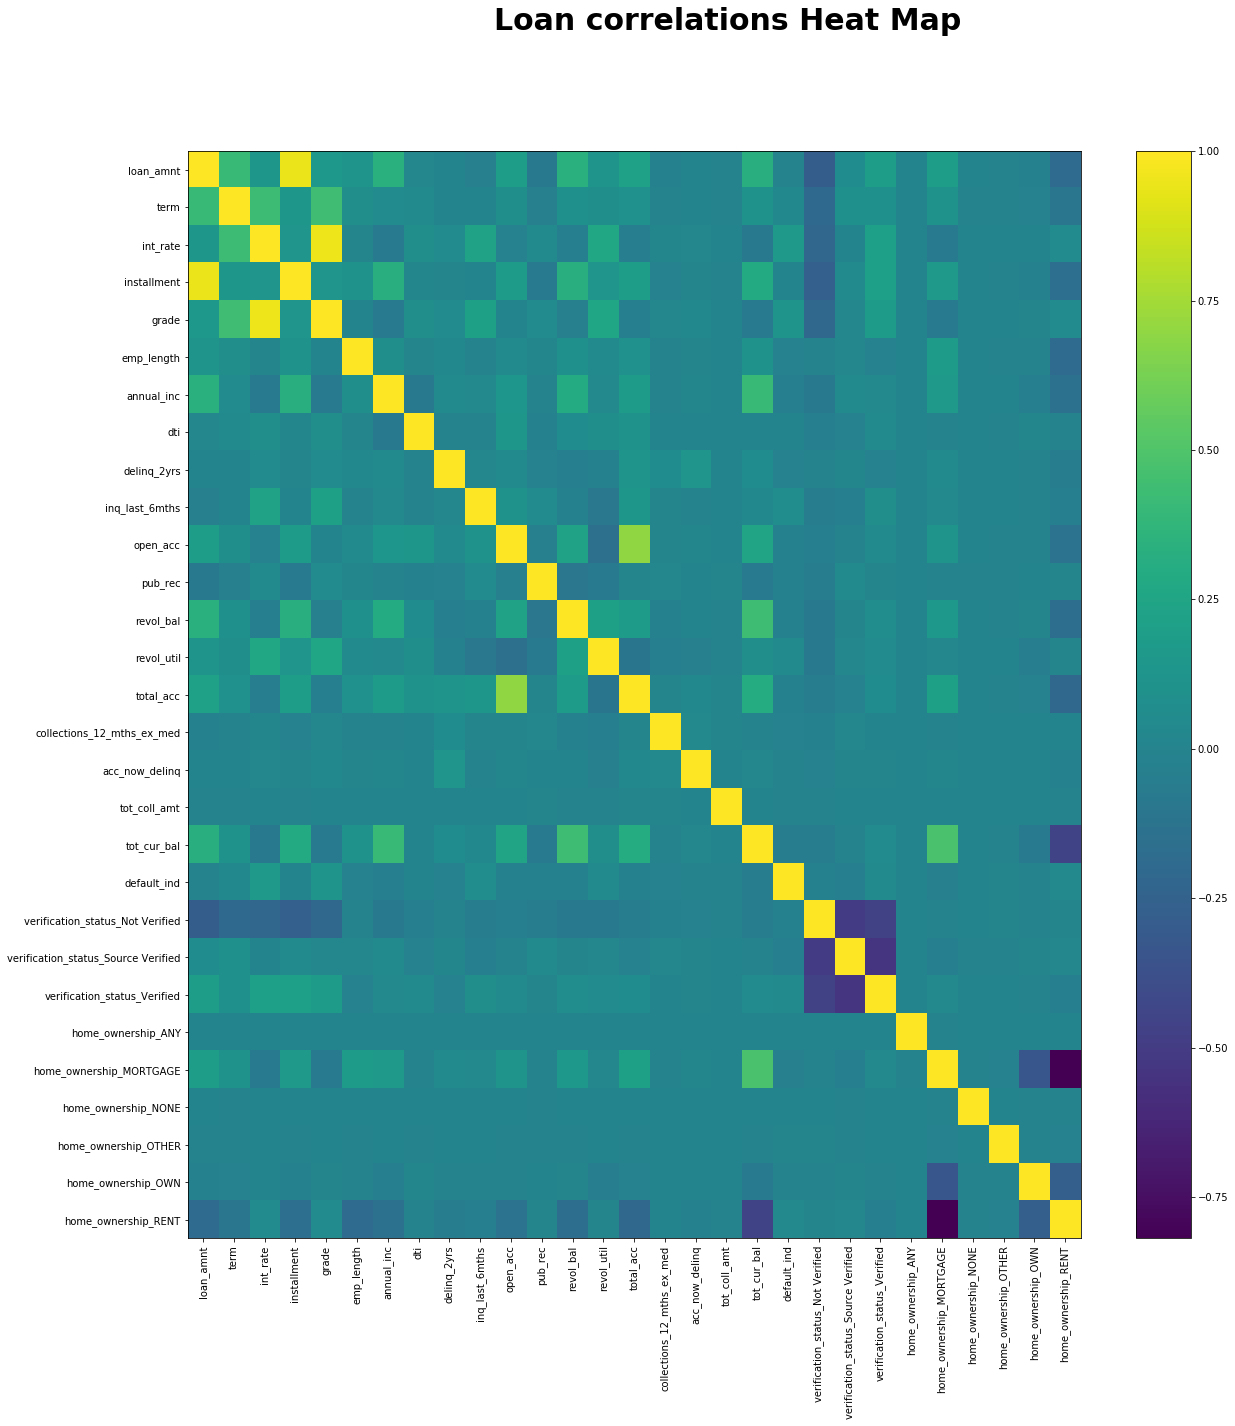

In [43]:
# Heatmap on the correlations between features in the loan data
credit_correlations = credit_data.corr()
plt.figure(figsize=(20, 20,))
plt.imshow(credit_correlations, cmap=None, interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(credit_correlations)), credit_correlations.columns, rotation='vertical')
plt.yticks(range(len(credit_correlations)), credit_correlations.columns);
plt.suptitle('Loan correlations Heat Map', fontsize=30, fontweight='bold')
plt.show()

Data preparation is finished and we can now start to apply machine learning algorithms in order to predict the credit risk.

It's usually better to visualize the data in some way. Visualization makes outliers and errors immediately stand out, whereas they might go unnoticed in a large table of numbers.
As the dataset contains to many rows, first we need to get a subset of the original dataset in order to be possiblle to apply the supervised learning algorithms to test our model.

## Step 5: Classification
[[ go back to the top ]](#Table-of-contents)

To advance to the data analysis we need to gather the test and the train samples. To do so we will import the function train_test_split from sklearn and use it on thecredit_data data.

In [44]:
from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

credit_data_subset = credit_data.sample(frac=0.10)
X = credit_data_subset[credit_data_subset.columns.drop(['default_ind', 'issue_d', 'earliest_cr_line', 'last_credit_pull_d'])] 
y = credit_data_subset['default_ind']

# get a test dataset with 10% of the credit_data_subset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_test.head(10)

,loan_amnt,term,int_rate,installment,grade,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,tot_cur_bal,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
262689,19175,36.0,16.29,676.89,4,10,75000.0,11.63,0,0,...,22555.0,1,0,0,0,0,0,0,0,1
353782,6000,36.0,18.99,219.91,5,10,164000.0,4.61,0,1,...,207976.0,1,0,0,0,1,0,0,0,0
597939,35000,60.0,9.99,743.48,2,10,85000.0,18.40,0,0,...,183145.0,0,0,1,0,1,0,0,0,0
652787,7000,36.0,17.57,251.56,4,10,53000.0,25.18,0,0,...,43471.0,0,0,1,0,0,0,0,0,1
682576,3000,36.0,13.33,101.56,3,0,100000.0,7.15,0,0,...,179635.0,1,0,0,0,0,0,0,0,1
68537,12000,36.0,12.99,404.27,2,5,42000.0,22.44,1,1,...,256122.0,0,0,1,0,0,0,0,0,1
742491,10000,36.0,16.55,354.30,4,4,36000.0,15.97,0,1,...,22617.0,0,0,1,0,0,0,0,0,1
91463,25000,60.0,19.52,655.69,4,10,72000.0,18.57,1,0,...,74470.0,0,0,1,0,1,0,0,0,0
504680,10000,60.0,18.99,259.36,5,8,49000.0,16.36,6,1,...,257273.0,0,1,0,0,1,0,0,0,0
809757,29000,36.0,6.68,891.20,1,9,105000.0,23.83,0,0,...,100411.0,0,1,0,0,0,0,0,0,1


This way, the test sample will have results with a size corresponding to 10% of the total data.

In [45]:
X_train.info()
print()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77032 entries, 642779 to 340747
Data columns (total 28 columns):
loan_amnt                              77032 non-null int64
term                                   77032 non-null float64
int_rate                               77032 non-null float64
installment                            77032 non-null float64
grade                                  77032 non-null int64
emp_length                             77032 non-null int64
annual_inc                             77032 non-null float64
dti                                    77032 non-null float64
delinq_2yrs                            77032 non-null int64
inq_last_6mths                         77032 non-null int64
open_acc                               77032 non-null int64
pub_rec                                77032 non-null int64
revol_bal                              77032 non-null int64
revol_util                             77032 non-null float64
total_acc                        

### 5.1: Decision Trees
[[ go back to the top ]](#Table-of-contents)

In [46]:
from sklearn.tree import DecisionTreeClassifier

# Create the classifier
decision_tree_classifier = DecisionTreeClassifier()

# Train the classifier on the training set
decision_tree_classifier.fit(X_train, y_train)

# Validate the classifier on the testing set using classification accuracy
decision_tree_classifier.score(X_test, y_test)

0.8962616822429906

We have achieved an accuracy of aproximately 89%. But let's see how this accuracy varies depending on how our training and testing set was sampled.

''

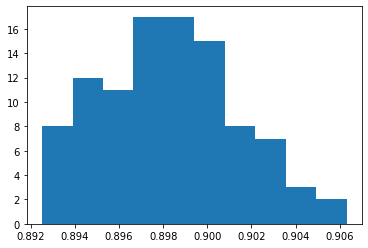

In [47]:
model_accuracies = []

for repetition in range(100):
    (training_inputs, testing_inputs, training_classes, testing_classes) = train_test_split(X, y, test_size=0.1)
    
    decision_tree_classifier = DecisionTreeClassifier()
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_accuracies.append(classifier_accuracy)
    
plt.hist(model_accuracies)
;

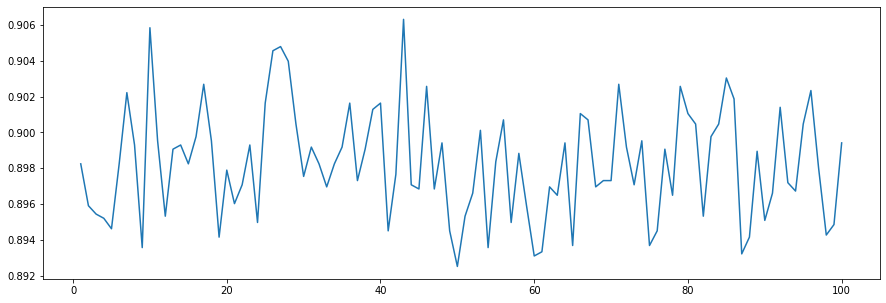

In [48]:
x = np.arange(1,101,1)
plt.figure(figsize=(15, 5))
plt.plot(x,model_accuracies)

In [49]:
print("Min: ", min(model_accuracies))
print("Max: ", max(model_accuracies))

Min:  0.8925233644859814
Max:  0.9063084112149533


Analysing this results, we conclude that the accuracy of the model doesn't vary much, around 3%. This is called **overfitting**, and happens because the model is learning to classify the training set so well that it doesn't generalize and perform well on data it hasn't seen before.

#### 5.1.1: Cross Validation
[[ go back to the top ]](#Table-of-contents)

In order to escape from *overfitting* problem, we can try to perform **k-fold cross-validation** on our model to estimate the skill of our machine learning model on unseen data. 

This procedure randomly splits the original dataset into *k* groups of approximately equal size, and then takes one of the subsets as training set and the other *k-1* subsets are used to fit the model. This process is then repeated *k* times such that each subset is used as the testing set exactly once.

10-fold cross-validation is the most common choice, so let's use that here.

''

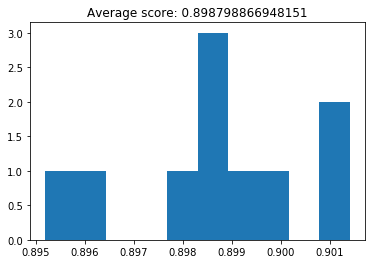

In [50]:
from sklearn.model_selection import cross_val_score

decision_tree_classifier = DecisionTreeClassifier()

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(decision_tree_classifier, X, y, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))
;

In [51]:
print("Min: ", min(cv_scores))
print("Max: ", max(cv_scores))

Min:  0.8951980371538731
Max:  0.9014018691588785


Now we have a more consistent rating of our classifier's general classification accuracy.

#### 5.1.2: Parameter Tuning
[[ go back to the top ]](#Table-of-contents)

Every Machine Learning model comes with a variety of parameters to tune, and these parameters can be vitally important to the performance of our classifier.

The most common method for model parameter tuning is **Grid Search**. The idea behind Grid Search is simple: explore a range of parameters and find the best-performing parameter combination. Focus your search on the best range of parameters, then repeat this process several times until the best parameters are discovered.

Let's tune our decision tree classifier. Let's start by tuning only two parameters and analyse the results.

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'max_depth': range(1,10),
                  'max_features': range(1, 10)}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(X, y)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.9468875595850079
Best parameters: {'max_depth': 4, 'max_features': 4}


Now let's visualize the grid search to see how the parameters interact.

''

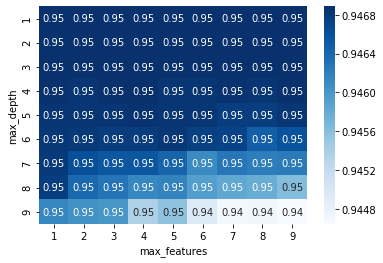

In [58]:
grid_visualization = grid_search.cv_results_['mean_test_score']
grid_visualization.shape = (9, 9)
sb.heatmap(grid_visualization, cmap='Blues', annot=True)
plt.xticks(np.arange(9) + 0.5, grid_search.param_grid['max_features'])
plt.yticks(np.arange(9) + 0.5, grid_search.param_grid['max_depth'])
plt.xlabel('max_features')
plt.ylabel('max_depth')
;

Now we have a better sense of the parameter space.

To allow the decision tree to make more than a one-off decision, the Decision Tree needs to have at least a `max_depth` of 2.

`max_features` parameter doesn't seem to make a huge difference in the results, as they are very similar independently of the number of *max_features*.

Now, let's apply grid search tunning more parameters in order to find the best options.

In [59]:
decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': range(1, 10),
                  'max_features': range(1,10)}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(X, y)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.9468875595850079
Best parameters: {'criterion': 'gini', 'max_depth': 4, 'max_features': 5, 'splitter': 'best'}


Let's get the best classifier:

In [62]:
decision_tree_classifier = grid_search.best_estimator_
decision_tree_classifier

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Here we have the best classifier, that allows our model to achieve a score of aproximately 95%. As the other Decision Tree models that we have calculated have an accuracy around 90%, it's a huge improve.

We can also visualize the Decision Tree:

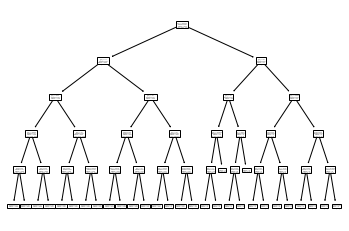

<Figure size 1080x10800 with 0 Axes>

In [253]:
import sklearn.tree as tree

tree.plot_tree(decision_tree_classifier)
plt.figure(figsize=(15, 150))
plt.show()

with open('iris_dtc.dot', 'w') as out_file:
    out_file = tree.export_graphviz(decision_tree_classifier, out_file=out_file)

### 5.2: K-Nearest Neighbor
[[ go back to the top ]](#Table-of-contents)

The K-Nearest Neighbors algorithm (k-NN) is a non-parametric classification method. The input consists of the k closest training examples in data set. The output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

Let's start to apply this algorithmn to our model with k=5 and see the results.

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [63]:
# Calculating the accuracy score
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
yk_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, yk_pred))

0.9397196261682244


For k=5, we have an accuracy of 93.97%, which is a good result. But let's see how the accuracy varies when k goes from 1 to 20.

In [64]:
# Testing accuracy for k ranging from 1 to 20
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

In [65]:
# Create a DataFrame of K and scores
column_dict = {'K':k_range, 'accuracy score':scores}
df = pd.DataFrame(column_dict).set_index('K')
df

,accuracy score
K,
1,0.897430
2,0.939603
3,0.933762
4,0.941355
5,0.939720
6,0.942523
7,0.941822
8,0.942640
9,0.942056


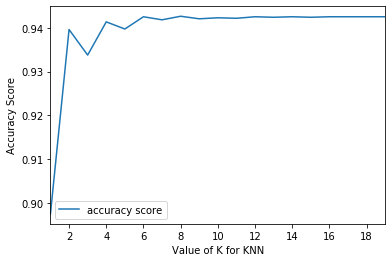

In [66]:
# Plot the relationship between K and Accuracy score.
df.plot(y='accuracy score');
plt.xlabel('Value of K for KNN');
plt.ylabel('Accuracy Score');

From this graphic, we can conclude that for the first 10 values the accuracy is a little bit variable, but then, from k= 10 to 20, the accuracy is more consistent.

In [67]:
# Find the maximum accuracy score and the associated K value.
df.sort_values('accuracy score')

,accuracy score
K,
1,0.897430
3,0.933762
2,0.939603
5,0.939720
4,0.941355
7,0.941822
9,0.942056
11,0.942173
10,0.942290


When using KNN on this data set with the selected features, we achieve the best accuracy when k=8, when the accuracy is 94.26%.